# Q 1

In [ ]:
from random import uniform
from math import pi
import numpy as np
import matplotlib.pyplot as plt

def Markov(N,δ):
    x,y=0,0
    inside=False
    x_inside=[]
    y_inside=[]
    x_outside=[]
    y_outside=[]
    for i in range(N):
        δx, δy = random.uniform(-δ,δ), random.uniform(-δ,δ)
        a,b=x+δx,y+δy
        if (abs(a)<1.) and (abs(b)<1.):  #move to new point
            x,y=a,b
            if x**2+y**2<1.:               #new point inside circle
                inside=True
                x_inside.append(x)
                y_inside.append(y)
            else:                          #new point outside circle
                inside=False
                x_outside.append(x)
                y_outside.append(y)
        else:                            #stay in former point
            if inside==True:               #stay inside circle
                x_inside.append(x)
                y_inside.append(y)
            else:                          #stay outside circle
                x_outside.append(x)
                y_outside.append(y)

    return x_inside, y_inside, x_outside, y_outside

After 1000 steps, the estimated π is equal to 3.336 for a relative error of 6.19 %


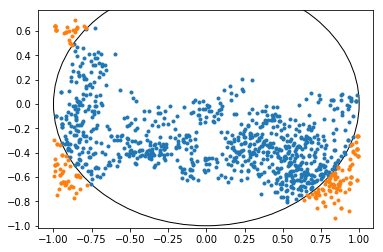

After 4000 steps, the estimated π is equal to 3.289 for a relative error of 4.69 %


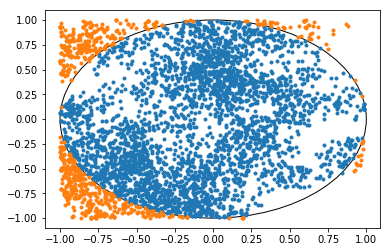

After 20000 steps, the estimated π is equal to 3.2116 for a relative error of 2.23 %


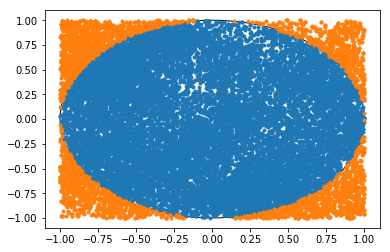

In [193]:
δ=.1

for N in [1000,4000,20000]:
    x_inside, y_inside, x_outside, y_outside = Markov(N,δ)
    π=4*len(x_inside)/N
    print ("After",N,"steps, the estimated π is equal to",π,"for a relative error of",round(abs((π/math.pi)-1)*100,2),"%")

    ax = plt.gca()
    ax.cla()  

    Circle = plt.Circle((0,0),1, fill=False)
    plt.plot(x_inside,y_inside,'.')
    plt.plot(x_outside,y_outside,'.')
    ax.add_artist(Circle)

    plt.show()


# Q 2

In [195]:
from random import uniform
from math import pi
import numpy as np
import matplotlib.pyplot as plt

def Markov_noplot(N,δ):
    x,y=0,0
    inside=True
    hits=0
    
    for i in range(N):
        δx, δy = random.uniform(-δ,δ), random.uniform(-δ,δ)
        a,b=x+δx,y+δy
        if (abs(a)<1.) and (abs(b)<1.):  #move to new point
            x,y=a,b
            if x**2+y**2<1.:               #new point inside circle
                inside=True
                hits+=4
            else:                          #new point outside circle
                inside=False
        else:                            #stay in former point
            if inside==True:               #count if inside circle
                hits+=4

    return hits

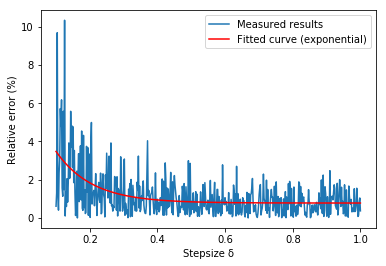

Estimated error for different stepsizes:
 For δ=0.4: 0.94 % 
 For δ=0.7: 0.79 % 
 For δ=1:   0.78 %


In [196]:
from scipy.optimize import curve_fit

def exp_approx(x, a, b, c):
    return a * np.exp(-b * x) + c

N=10000
error=[]
δrange=np.linspace(.1,1,500)

for δ in δrange:
    hits = Markov_noplot(N,δ)
    π=hits/N*1.
    error.append(abs((π/math.pi)-1)*100)
    
plt.plot(δrange,error, label='Measured results')

popt, pcov = curve_fit(exp_approx, δrange, error)
a,b,c=popt
f=exp_approx(δrange, *popt)
plt.plot(δrange, f, 'r-', label='Fitted curve (exponential)')

plt.xlabel('Stepsize δ')
plt.ylabel('Relative error (%)')
plt.legend()
plt.show()

print("Estimated error for different stepsizes:\n For δ=0.4:",round((a*np.exp(-b*.4)+c),2),"% \n For δ=0.7:",round((a*np.exp(-b*.7)+c),2),"% \n For δ=1:  ",round((a*np.exp(-b)+c),2),"%")


After 1000 steps, the estimated π is equal to 3.044 for a relative error of 3.11 %


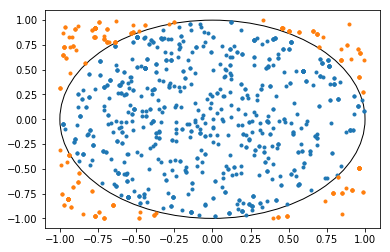

After 4000 steps, the estimated π is equal to 3.166 for a relative error of 0.78 %


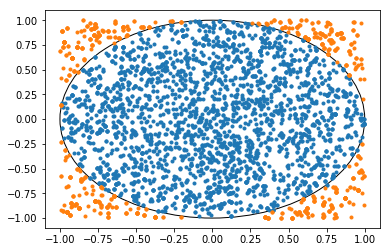

After 20000 steps, the estimated π is equal to 3.1512 for a relative error of 0.31 %


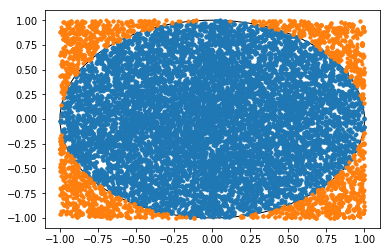

In [199]:
δ=1

for N in [1000,4000,20000]:
    x_inside, y_inside, x_outside, y_outside = Markov(N,δ)
    π=4*len(x_inside)/N*1.
    print ("After",N,"steps, the estimated π is equal to",π,"for a relative error of",round(abs((π/math.pi)-1)*100,2),"%")

    ax = plt.gca()
    ax.cla()  

    Circle = plt.Circle((0,0),1, fill=False)
    plt.plot(x_inside,y_inside,'.')
    plt.plot(x_outside,y_outside,'.')
    ax.add_artist(Circle)

    plt.show()


# Q 4

In [184]:
def bunching(N,N_runs,N_iterations,δ):
    S=np.zeros(N_runs)
    π=math.pi
    
    Overall_Err=[]
    Overall_Variance=[]
    
    for i in range(N_runs):
        S[i] = (Markov_noplot(N,δ))/N      #Storing the obtained π of the run i

    for j in range(N_iterations):            #Throughout N_iterations procedures

        Sb=np.zeros(N_runs//2)

        for k in range(N_runs//2):
            Sb[k]=(S[2*k]+S[2*k+1])/2       #New data points made of 2-by-2 averages
        
        Mean=np.mean(Sb)                    #Mean of the new data points
        Variance=np.var(Sb)                 #Variance of the new data points
        Err=((Mean-π)**2)                   #Error of the new data points
        Overall_Err.append(Err)

        N_runs=N_runs//2                        #New number of data points (rescaling)
        S=Sb
        print(round(Mean,4)," ",Err)
        
    L=list(range(N_iterations))
    print(M)
    plt.plot(L,Overall_Err,'o',color='r')
    plt.xlabel('Bunching iterations')
    plt.ylabel('Error')
    plt.yscale('log')
    plt.grid()
    plt.show()

3.1415   9.78192007397e-09
3.1415   9.78192007388e-09
3.1415   9.78192007388e-09
3.1415   9.78192007406e-09
3.1415   9.78192007397e-09
3.1415   9.78192007388e-09
3.1415   9.78192007397e-09
3.1415   9.78192007397e-09
4


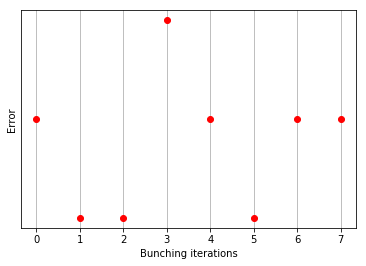

In [187]:
bunching(5000,1024,8,1)

Unchanged mean value: check